In [36]:
import os
os.chdir('/home/jagust/dino/surf')
from surf import *
%matplotlib inline

In [37]:
trav_glob = '/home/jagust/dino/surf/simulation_trials/ignore_pib_pos/*traversal.npy'
trav_paths = sorted(glob(trav_glob))
order = list(np.load('/home/jagust/dino/surf/simulation_trials/order_or_removals.npy'))
young_neg = np.load('/home/jagust/dino/surf/mats/young_geno_neg.npy')
young_pos = np.load('/home/jagust/dino/surf/mats/young_geno_pos.npy')

In [38]:
neg_degs, pos_degs = [], []
for path in young_neg:
    path = str(path)
    mat = np.load(path)
    neg_degs.append(np.mean(nx.Graph(mat).degree(weight='weight').values()))
for path in young_pos:
    path = str(path)
    mat = np.load(path)
    pos_degs.append(np.mean(nx.Graph(mat).degree(weight='weight').values()))

In [39]:
neg_degs=[deg for deg in neg_degs if deg == deg]
pos_degs=[deg for deg in pos_degs if deg == deg]

In [40]:
stats.ttest_ind(neg_degs, pos_degs)

(0.24468030360763585, 0.80802043685858471)

In [41]:
def is_young_neg(subid):
    for path in young_neg:
        if find_id(path) == subid:
            return True
def is_young_pos(subid):
    for path in young_pos:
        if find_id(path) == subid:
            return True

In [52]:
young_neg_corr, young_pos_corr, old_neg_corr, old_pos_corr = [], [], [], []
for path in trav_paths:
    trav = list(np.load(path))
    subid = find_id(path)
    trav_vals, order_vals = [], []
    for reg in range(80):
        order_vals.append(order.index(reg))
        trav_vals.append(trav.index(reg))
    r, p = stats.pearsonr(trav_vals, order_vals)
    if is_young_neg(subid):
        young_neg_corr.append(r)
    elif is_young_pos(subid):
        young_pos_corr.append(r)
    elif is_geno_neg(subid):
        old_neg_corr.append(r)
    else:
        old_pos_corr.append(r)

In [55]:
stats.ttest_ind(young_neg_corr + old_neg_corr,  young_pos_corr + old_pos_corr)

(0.6025928373434144, 0.54887619955642486)

In [58]:
stats.ttest_ind(young_neg_corr + young_pos_corr,  old_neg_corr + old_pos_corr)

(0.47043100472581267, 0.63962186039922875)

In [59]:
stats.ttest_ind(young_pos_corr, old_pos_corr)

(0.61929548862186801, 0.54024681064755953)

In [60]:
stats.ttest_ind(young_neg_corr, old_neg_corr)

(0.013064168189405638, 0.98965771001278036)

In [77]:
young_neg_mat = np.load('/home/jagust/dino/surf/mats/young_neg_med_mat.npy')
young_pos_mat = np.load('/home/jagust/dino/surf/mats/young_pos_med_mat.npy')
young_mat = np.load('/home/jagust/dino/surf/mats/young_med_mat.npy')
old_neg_mat = np.load('/home/jagust/dino/surf/mats/ignore_pib_pos/neg_med_mat.npy')
old_pos_mat = np.load('/home/jagust/dino/surf/mats/ignore_pib_pos/pos_med_mat.npy')
matches = np.load('/home/jagust/dino/surf/matches.npy')
young_neg_vis, young_pos_vis, old_neg_vis, old_pos_vis = [], [], [], []

In [78]:
os.chdir('/home/jagust/dino/surf/mats/ignore_pib_pos/')
pos_pib, neg_pib = np.load('pos_pib_dat.npy'), np.load('neg_pib_dat.npy')
group_pib = np.vstack((pos_pib, neg_pib))
pib_vals = pd.DataFrame(group_pib, dtype = float)
corr_mat = np.array(pib_vals.corr())
np.fill_diagonal(corr_mat, 0.0)
pib_g = nx.Graph(corr_mat)
# Find seed
add_distance_attr(pib_g)
pib_degs = pib_g.degree(weight='weight')
sorted_degs = sort_by_val(pib_degs)[::-1]
seed = sorted_degs[0][0]
seed

74

In [96]:
pib_g = nx.Graph(corr_mat)
add_distance_attr(pib_g)
order = [seed]
while len(order) < 80:
#     print len(old_neg_vis)
    rem = find_next_node(order, pib_g)
    order.append(rem)

In [88]:
def find_next_node(r, g):
    """ Slight variation of Prim's Algorithm; instead of minimizing the total 
    """
    nodes = g.nodes()
    distance = {}
    for node in nodes:
        if node in r:
            continue
        distance[node] = 0.0
        for removed in r:
            distance[node] += nx.shortest_path_length(g, node, removed, weight='distance')
        sorted_distances = sort_by_val(distance)
    return sorted_distances[0][0]

In [91]:
old_neg_g = nx.Graph(old_neg_mat)
add_distance_attr(old_neg_g)
old_neg_vis = [seed]
while len(old_neg_vis) < 80:
#     print len(old_neg_vis)
    rem = find_next_node(old_neg_vis, old_neg_g)
    old_neg_vis.append(rem)

In [92]:
old_pos_g = nx.Graph(old_pos_mat)
add_distance_attr(old_pos_g)
old_pos_vis = [seed]
while len(old_pos_vis) < 80:
#     print len(old_pos_vis)
    rem = find_next_node(old_pos_vis, old_pos_g)
    old_pos_vis.append(rem)

In [93]:
young_neg_g = nx.Graph(young_neg_mat)
add_distance_attr(young_neg_g)
young_neg_vis = [seed]
while len(young_neg_vis) < 80:
#     print len(young_neg_vis)
    rem = find_next_node(young_neg_vis, young_neg_g)
    young_neg_vis.append(rem)

In [94]:
young_pos_g = nx.Graph(young_pos_mat)
add_distance_attr(young_pos_g)
young_pos_vis = [seed]
while len(young_pos_vis) < 80:
#     print len(young_pos_vis)
    rem = find_next_node(young_pos_vis, young_pos_g)
    young_pos_vis.append(rem)

Old Negative
r: 0.331715893108
p: 0.00264828570004
Old Positive
r: -0.301758087201
p: 0.0065232458986


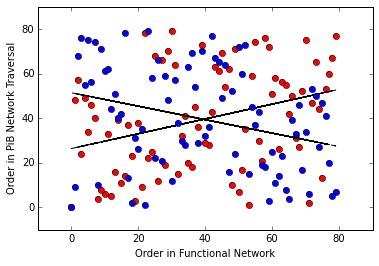

In [102]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist = [], []
visited = old_neg_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'ro', xlist, fit_fn(xlist), '--k')
r, p = stats.pearsonr(xlist, ylist)
print 'Old Negative'
print 'r: ' + str(r)
print 'p: ' + str(p)
# ax.annotate('r: ' + str(r), xy=(79, 40))
# ax.annotate('r: ' + str(stats.pearsonr(xlist, ylist)[0]), xy=(79, 50))

xlist, ylist = [], []
visited = old_pos_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'bo', xlist, fit_fn(xlist), '--k')
r, p = stats.pearsonr(xlist, ylist)
plt.xlabel('Order in Functional Network')
plt.ylabel('Order in PiB Network Traversal')
print 'Old Positive'
print 'r: ' + str(r)
print 'p: ' + str(p)

Young Negative
r: 0.15131270511
p: 0.180306972285
Young Positive
r: 0.2290201594
p: 0.04101043126


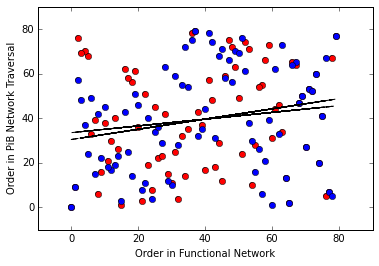

In [103]:
plt.figure()
fig = plt.figure()
ax = fig.add_subplot(111)
xlist, ylist = [], []
visited = young_neg_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'ro', xlist, fit_fn(xlist), '--k')
r, p = stats.pearsonr(xlist, ylist)
print 'Young Negative'
print 'r: ' + str(r)
print 'p: ' + str(p)
# ax.annotate('r: ' + str(r), xy=(79, 40))
# ax.annotate('r: ' + str(stats.pearsonr(xlist, ylist)[0]), xy=(79, 50))

xlist, ylist = [], []
visited = young_pos_vis
for reg in range(80):
    x, y = visited.index(reg), order.index(reg)
    xlist.append(x)
    ylist.append(y)
    plt.scatter(x, y)
    
fit = np.polyfit(xlist,ylist,1)
fit_fn = np.poly1d(fit) 
plt.plot(xlist, ylist, 'bo', xlist, fit_fn(xlist), '--k')
r, p = stats.pearsonr(xlist, ylist)
plt.xlabel('Order in Functional Network')
plt.ylabel('Order in PiB Network Traversal')
print 'Young Positive'
print 'r: ' + str(r)
print 'p: ' + str(p)

In [ ]:
# Consider using all PiB data